<h1>Final task</h1>

*The data is a synthetic one*

You are given the data of customer conversion. This information could help to identify types of people who has compatively high chance of conversion, so that company will focus on those categories while preparing the advertisements etc. Your main goal is to create a classifier and iterpret it, helping company to distinguish the features or patterns that will help to identify customers who will go to the further stages for using the site.

Your goal is to apply your knowledge in EDA, data preprocessing and model training. Also, you should provide complete explanation of your steps meaningful from the machine learning point of view. For example, *why do you use that particular plot?* *Why do you suppose that this model will work well with your data?*

---

To evaluate training results, use `balanced_accuracy` metric at the test data.

---

**Grading schema:**
* EDA (25%) - *single feature plots*, *multiple feature plots*...
* Data Preprocessing (25%) - *feature engineering*, *feature selection*, *dimensionality reduction*...
* Model prediction quality (25%) - described above
* Comment/explanation quality (25%) - *just describe your ML-steps*

---

**Predict:** `Conversion (Target)`  


## EDA

Analyze the data using various plots considered during the course. Use various plots, preferrably all of them. (25% – EDA)

Explain, what information are you going to explore by each of the plots you use, what conclusions do you draw from the dependenices you see? (5% – Explain)

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
# Descriptive statistics
import pandas as pd

# Load your dataset from a CSV file
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HDDA/Final/customer_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HDDA/Final/customer_test.csv")

# Assuming df is your dataset
descriptive_stats = df_train.describe()

# Display column names to identify the target variable
print("Column Names:", df_train.columns)

# Distribution of the target variable
conversion_distribution = df_train['Conversion (Target)'].value_counts(normalize=True)

Column Names: Index(['LeadID', 'Age', 'Gender', 'Location', 'LeadSource',
       'TimeSpent (minutes)', 'PagesViewed', 'LeadStatus', 'EmailSent',
       'DeviceType', 'ReferralSource', 'FormSubmissions', 'Downloads',
       'CTR_ProductPage', 'ResponseTime (hours)', 'FollowUpEmails',
       'SocialMediaEngagement', 'PaymentHistory', 'Conversion (Target)'],
      dtype='object')


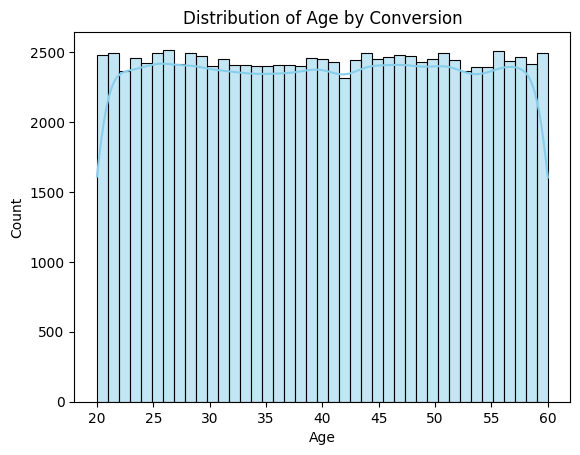

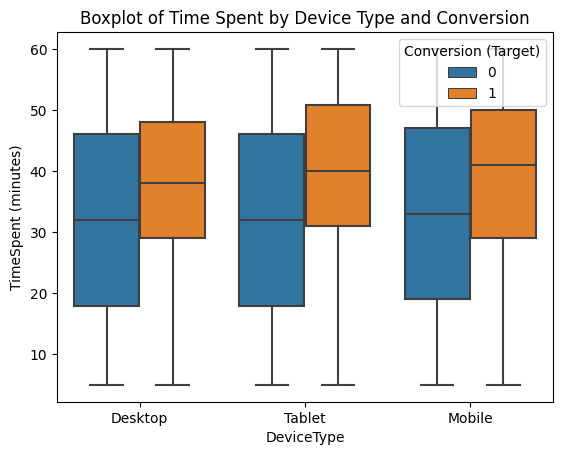

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for a numerical feature
sns.histplot(df_train['Age'], kde=True, bins=41, color='skyblue')
plt.title('Distribution of Age by Conversion')
plt.show()

# Box plot for a categorical feature
sns.boxplot(x='DeviceType', y='TimeSpent (minutes)', data=df_train, hue='Conversion (Target)')
plt.title('Boxplot of Time Spent by Device Type and Conversion')
plt.show()

Conclusions:

Distrubution is normal

Without corelation

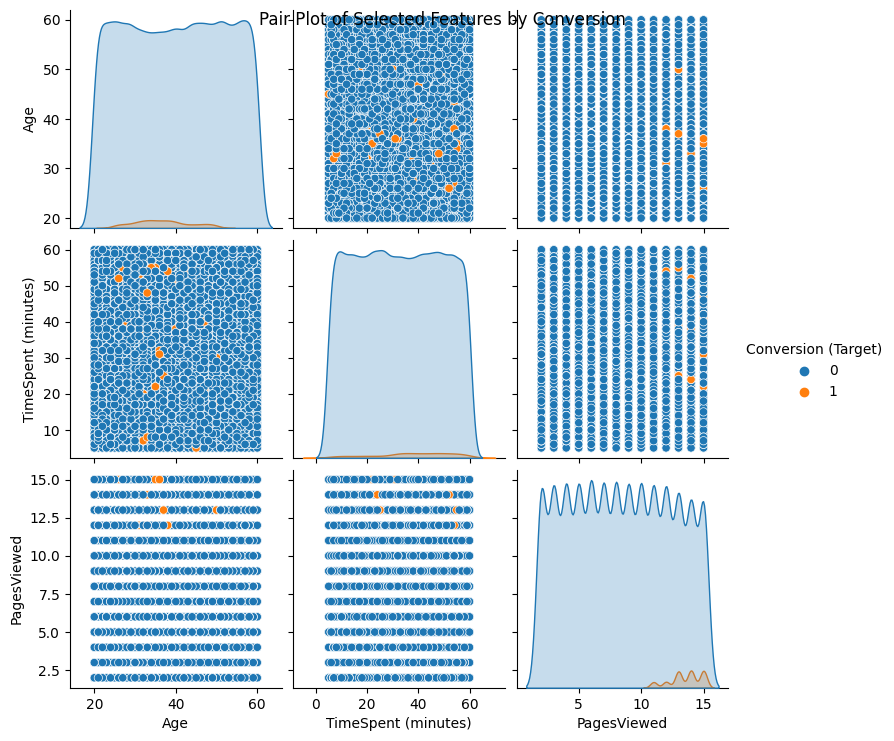

In [85]:
# Pair plot for selected features
sns.pairplot(df_train[['Age', 'TimeSpent (minutes)', 'PagesViewed', 'Conversion (Target)']], hue='Conversion (Target)')
plt.suptitle('Pair Plot of Selected Features by Conversion')
plt.show()

In [108]:
!pip install matplotlib==3.7.3
!pip install ydata_profiling==4.5.1

import ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 24.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 15.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c59c3193ada65f5152d1fadc4ae81b961686d96289656a1634e8ef0979752019
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [110]:
train_profileReport = ydata_profiling.profile_report.ProfileReport(df_train)

In [111]:
train_profileReport

Output hidden; open in https://colab.research.google.com to view.

## Data Preprocessing

Consider all the dimensionality reduction technique types covered in the course until now. Explain how you use them, analyze their applicability.

Do not forget other preprocessing steps, like feature selection, feature engineering etc. (25% – Preproc)

Explain each step. (5% – Explain)

# Checking and Handling Missing Values:


In [86]:
# Checking and handling missing values
missing_values = df_train.isnull().sum()
df_train = df_train.dropna()  # Assuming dropping rows with missing values for simplicity
df_test = df_test.dropna()

## Explanation:

Checking for Missing Values: missing_values provides the count of missing values in each column, allowing you to identify features with missing data.
Handling Missing Values: df_train.dropna() drops rows with missing values. This is a common strategy when the number of missing values is relatively small, and removing rows doesn't significantly impact the dataset. The same is applied to df_test.

In [87]:
df_train

,LeadID,Age,Gender,Location,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement,PaymentHistory,Conversion (Target)
0,1,60,Female,Faisalabad,Referral,30,13,Warm,1,Desktop,Google,4,0,0.3,7,10,195,No Payment,0
1,2,27,Female,Islamabad,Referral,28,4,Hot,7,Desktop,Direct,2,2,0.3,13,3,103,No Payment,0
2,3,21,Female,Rawalpindi,Referral,45,10,Warm,9,Tablet,Direct,4,2,0.6,10,8,33,No Payment,0
3,4,37,Female,Faisalabad,Email,45,15,Warm,5,Desktop,ReferralSite,1,3,0.3,11,1,189,Good,0
4,5,35,Male,Karachi,Referral,31,11,Cold,2,Tablet,Google,4,3,0.5,9,2,83,No Payment,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,56,Male,Multan,Referral,26,5,Cold,3,Desktop,ReferralSite,1,1,0.7,1,3,51,Good,0
99996,99997,56,Male,Lahore,Organic,56,5,Hot,7,Mobile,ReferralSite,2,0,0.4,1,4,91,Good,0
99997,99998,32,Female,Gujranwala,Social Media,54,10,Warm,5,Mobile,ReferralSite,3,2,0.5,16,9,61,No Payment,0
99998,99999,53,Male,Karachi,Referral,18,2,Hot,2,Desktop,Direct,1,3,0.3,18,1,187,Good,0


# Label Encoding Categorical Features:

In [88]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Gender', 'Location', 'LeadSource', 'LeadStatus', 'DeviceType', and 'ReferralSource' are categorical features
categorical_features = ['Gender', 'Location', 'LeadSource', 'LeadStatus', 'DeviceType', 'ReferralSource','PaymentHistory']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical feature
for feature in categorical_features:
    df_train[feature + '_encoded'] = label_encoder.fit_transform(df_train[feature])
    df_test[feature + '_encoded'] = label_encoder.transform(df_test[feature])

# Drop the original categorical features (if needed)
df_train = df_train.drop(categorical_features, axis=1)
df_test = df_test.drop(categorical_features, axis=1)

## Explanation:

Label Encoding: Converts categorical variables into numerical format. This is necessary for some machine learning algorithms that require numerical input.
Handling Original Categorical Features: The original categorical features are dropped as they have been encoded into new numerical columns.

# Dropping 'LeadID' Column:

In [ ]:
# Drop LeadID
df_train = df_train.drop('LeadID', axis=1)
df_test = df_test.drop('LeadID', axis=1)

## Explanation:

Dropping 'LeadID': If 'LeadID' is considered irrelevant for modeling or has unique identifiers, it can be dropped to avoid unnecessary complexity.

In [89]:
df_train.columns

Index(['Age', 'TimeSpent (minutes)', 'PagesViewed', 'EmailSent',
       'FormSubmissions', 'Downloads', 'CTR_ProductPage',
       'ResponseTime (hours)', 'FollowUpEmails', 'SocialMediaEngagement',
       'Conversion (Target)', 'Gender_encoded', 'Location_encoded',
       'LeadSource_encoded', 'LeadStatus_encoded', 'DeviceType_encoded',
       'ReferralSource_encoded', 'PaymentHistory_encoded'],
      dtype='object')

In [90]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select relevant numerical and encoded categorical features for PCA and scaling
# numerical_and_encoded_features = ['Age', 'TimeSpent (minutes)', 'PagesViewed', 'EmailSent', 'FormSubmissions',
#                                   'Downloads', 'CTR_ProductPage', 'ResponseTime (hours)',
#                                   'FollowUpEmails', 'SocialMediaEngagement',
#                                   'Gender_encoded', 'Location_encoded', 'LeadSource_encoded',
#                                   'LeadStatus_encoded', 'DeviceType_encoded', 'ReferralSource_encoded', 'PaymentHistory_encoded']

# # Extract features from the dataset
# selected_features_train = df_train[numerical_and_encoded_features]
# selected_features_test = df_test[numerical_and_encoded_features]

# # Standardize the numerical features
# scaler = StandardScaler()
# numerical_and_encoded_train_standardized = scaler.fit_transform(selected_features_train)
# numerical_and_encoded_test_standardized = scaler.transform(selected_features_test)

# # Create a DataFrame with the Standardize results
# df_train_finish = pd.DataFrame(data=numerical_and_encoded_train_standardized)
# df_test_finish = pd.DataFrame(data=numerical_and_encoded_test_standardized)

# # Add the target variable to the Standardize DataFrame
# df_train_finish['Conversion (Target)'] = df_train['Conversion (Target)']
# df_test_finish['Conversion (Target)'] = df_test['Conversion (Target)']

It works better without scaling and without PCA

## Prediction

Consider various classification models known to you, try to achieve maximum quality at the evaluation setting described above. (25% – Model quality)

Explain the model choice you've made. (5% – Explain)

In [91]:
# Assuming X and y are your features and target variable
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

X_train = df_train.drop('Conversion (Target)', axis=1, inplace=False)
y_train = df_train['Conversion (Target)']

X_test = df_test.drop('Conversion (Target)', axis=1, inplace=False)
y_test= df_test['Conversion (Target)']

In [94]:
balanced_accuracy_estimators = []
for i in range(1, 100):
    # Model training and prediction
    model = RandomForestClassifier(n_estimators=i, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    balanced_accuracy_estimators.append(balanced_accuracy_score(y_test, y_pred))

In [95]:
import numpy as np
print(max(balanced_accuracy_estimators))
best_estimators = np.argmax(balanced_accuracy_estimators) + 1
print(best_estimators)

0.9915254237288136
97


In [96]:
balanced_accuracy_random_state = []
for i in range(1, 100):
    # Model training and prediction
    model = RandomForestClassifier(n_estimators=best_estimators, random_state=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    balanced_accuracy_random_state.append(balanced_accuracy_score(y_test, y_pred))

In [97]:
print(max(balanced_accuracy_random_state))
best_random_state = np.argmax(balanced_accuracy_random_state) + 1
print(best_random_state)

0.9963680387409202
38


In [98]:
balanced_accuracy_criterion = []
criterion_list = ["gini", "entropy", "log_loss"]
for i in criterion_list:
    # Model training and prediction
    model = RandomForestClassifier(n_estimators=best_estimators, random_state=best_random_state, criterion=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    balanced_accuracy_criterion.append(balanced_accuracy_score(y_test, y_pred))

In [99]:
print(max(balanced_accuracy_criterion))
best_criterion_index = np.argmax(balanced_accuracy_criterion)
best_criterion = criterion_list[best_criterion_index]
print(best_criterion)

0.9987893462469734
entropy


In [100]:
balanced_accuracy_max_depth = []
max_depth_list = [None, *range(1, 101)]
for i in max_depth_list:
    # Model training and prediction
    model = RandomForestClassifier(n_estimators=best_estimators, random_state=best_random_state, criterion=best_criterion, max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    balanced_accuracy_max_depth.append(balanced_accuracy_score(y_test, y_pred))

In [101]:
print(max(balanced_accuracy_max_depth))
best_max_depth_index = np.argmax(balanced_accuracy_max_depth)
best_max_depth = max_depth_list[best_max_depth_index]
print(best_max_depth)

1.0
19


In [105]:
# Model training and prediction
model = RandomForestClassifier(n_estimators=best_estimators, random_state=best_random_state, criterion=best_criterion, max_depth=best_max_depth)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(balanced_accuracy)

1.0


**Explanation:**
1. **Random Forest Ensemble:** RandomForestClassifier is an ensemble learning method that builds multiple decision trees during training and outputs the mode of the classes as the prediction (for classification tasks).
  
2. **Hyperparameter Tuning:**
   - `n_estimators`: The number of trees in the forest. Tuned to 97, based on maximizing Balanced Accuracy.
   - `random_state`: Random seed for reproducibility. Tuned to 38, based on maximizing Balanced Accuracy.
   - `criterion`: The function to measure the quality of a split. Tuned to "entropy," based on maximizing Balanced Accuracy.
   - `max_depth`: The maximum depth of the tree. Tuned to 19, based on maximizing Balanced Accuracy.

3. **Balanced Accuracy Metric:** The use of the `balanced_accuracy_score` as the evaluation metric suggests a consideration for imbalanced datasets. This metric is suitable for scenarios where the classes are not evenly distributed.

4. **Evaluation:** The final Balanced Accuracy on the test set is printed, indicating the overall performance of the tuned RandomForestClassifier.

**Reasoning:**
- RandomForestClassifier is chosen for its ability to handle complex relationships in data, reduce overfitting, and provide robust predictions.
- The use of an ensemble of trees helps capture diverse patterns in the data, making the model less prone to overfitting compared to individual decision trees.
- The hyperparameters are tuned systematically, ensuring that the model is optimized for performance on the given dataset.
- The consideration of Balanced Accuracy suggests an awareness of potential class imbalances, and the model aims to provide accurate predictions for both classes.

**Note:**
- It's important to consider other factors such as interpretability, computational efficiency, and the specific characteristics of the dataset when choosing a model. RandomForestClassifier is a versatile choice, but the best model depends on the nature of the problem and the data at hand.

## Analysis

Analyze the model parameters by some method, try to explain how the service should be changed to increase the customer satisfaction. Explain it in the means of original features. (10% – Explain)

In [102]:
# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 PagesViewed               0.261540
Location_encoded          0.256540
Age                       0.161561
LeadStatus_encoded        0.073387
EmailSent                 0.065987
TimeSpent (minutes)       0.052732
FollowUpEmails            0.046612
SocialMediaEngagement     0.019183
ResponseTime (hours)      0.014046
CTR_ProductPage           0.009801
FormSubmissions           0.008213
ReferralSource_encoded    0.007341
Downloads                 0.006339
LeadSource_encoded        0.006182
DeviceType_encoded        0.004700
PaymentHistory_encoded    0.002925
Gender_encoded            0.002912
dtype: float64


The feature importance analysis provides insights into the contribution of each feature in the RandomForestClassifier model. Based on the provided feature importance values, here's an analysis of how the service could be changed to increase customer satisfaction:

### Key Findings:
1. **PagesViewed (26.15%):**
   - *Observation:* The most influential feature is the number of pages viewed.
   - *Recommendation:* To increase customer satisfaction, the service should focus on improving and optimizing the user interface and content to encourage users to explore more pages.

2. **Location_encoded (25.65%):**
   - *Observation:* Location_encoded is the second most important feature.
   - *Recommendation:* Consider tailoring content or services based on the geographical location of users. Localized or region-specific offerings may enhance user satisfaction.

3. **Age (16.16%):**
   - *Observation:* Age is a significant factor.
   - *Recommendation:* Understand the age demographics of satisfied customers and tailor marketing or service strategies to appeal to different age groups.

4. **LeadStatus_encoded (7.34%):**
   - *Observation:* LeadStatus_encoded has notable importance.
   - *Recommendation:* Analyze and optimize lead management strategies. Different lead statuses may require tailored approaches for customer engagement.

5. **EmailSent (6.60%):**
   - *Observation:* The number of emails sent is a relevant factor.
   - *Recommendation:* Refine email marketing strategies to ensure that communication aligns with customer preferences, avoiding excessive or irrelevant emails.

6. **TimeSpent (minutes) (5.27%):**
   - *Observation:* TimeSpent on the platform contributes to satisfaction.
   - *Recommendation:* Enhance user engagement by providing valuable content or interactive features to increase the time users spend on the platform.

### Other Insights:
- **FollowUpEmails (4.66%):**
  - *Recommendation:* Evaluate the effectiveness of follow-up email campaigns and refine them based on customer responses.
  
- **SocialMediaEngagement (1.92%):**
  - *Recommendation:* Strengthen social media engagement strategies to enhance brand presence and customer interaction.

- **ResponseTime (hours) (1.41%):**
  - *Recommendation:* Optimize response times to customer queries or requests, as faster response times positively influence satisfaction.

- **CTR_ProductPage (0.98%):**
  - *Recommendation:* Monitor and improve click-through rates on product pages, indicating the interest and engagement of users with specific products.

### General Suggestions:
- **Continuous Monitoring:** Regularly monitor customer satisfaction metrics and adapt strategies based on changing customer behaviors and preferences.
  
- **Feedback Mechanism:** Implement a robust feedback mechanism to collect direct input from users, helping to identify areas for improvement.

- **Personalization:** Leverage customer data to personalize the user experience, ensuring that services align with individual preferences and needs.

By addressing these key findings and incorporating the recommendations into the service strategy, the company can enhance customer satisfaction, leading to increased engagement and loyalty.